<a href="https://colab.research.google.com/github/theclosedbook/TensorFlow/blob/main/02_Neural_Netwrok_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

A classification is where you try to classify something as one thing or another

A few types of classificationproblems:
* Binary classificaton
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles (n_samples , noise = 0.03 , random_state = 42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"lablel":y})
circles

,X0,X1,lablel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


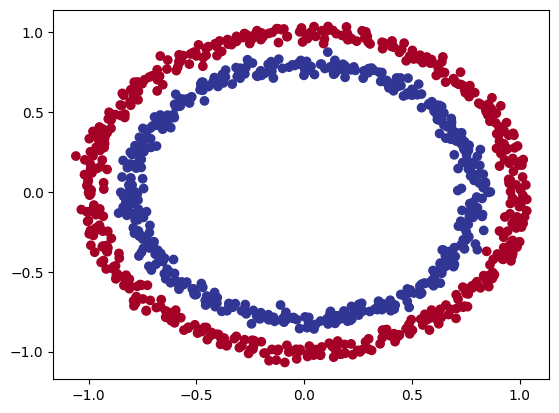

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Complie the model
3. Fit the model
4. Evaluate the model

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# compile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics =['accuracy'])
# fit the model
model_1.fit(X,y,epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 5.8742 - accuracy: 0.4890
Epoch 2/5
32/32 [==============================] - 0s 948us/step - loss: 5.3212 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.6269 - accuracy: 0.4550
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 2.5969 - accuracy: 0.4790
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7568 - accuracy: 0.4970


In [ ]:
# Training for longer
model_1.fit(X,y,epochs = 200 , verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 954us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
# Adding an extra layer
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compilinf the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
# Fit the model
model_2.fit(X,y,epochs = 100, verbose=0)

In [ ]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Improving the model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might to choose a different optimization function such as Adam instead of SGD
3. Fiting the model - perhaps we might fit our model for more epochs


In [ ]:
# set the random seed
tf.random.set_seed(42)
# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
# Fit the model
model_3.fit(X,y,epochs = 100 ,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5050


[0.6977934837341309, 0.5049999952316284]

To visualize our model's predictions, lets create a function `plot_decision_boundary()` , this function will:

* Take in a trained model , features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 889us/step
doing binary classifcation...


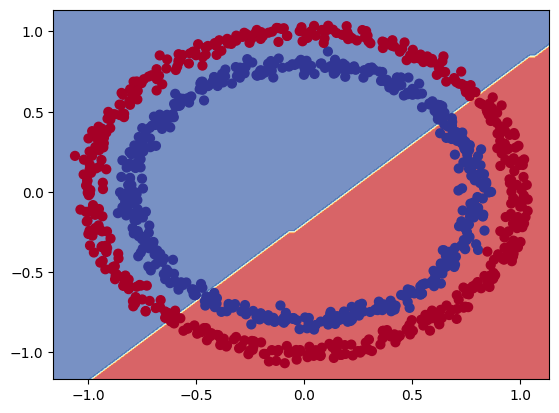

In [ ]:
# Check out the predictions oof our model
plot_decision_boundary(model = model_3,X=X,y=y)

In [ ]:
# Lets see if our model can be used for a regression model
# set random seed
tf.random.set_seed(42)
# create some regression data
X_regression = tf.range(0,1000,5)
y_regression =tf.range(100,1100,5)
#splitting data in trainnig and testing data set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [ ]:
# Recreating the model for running regression model
# create the model
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compiling the model
model_reg.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['mae'])
# Fit the model
model_reg.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 438.4503 - mae: 438.4503
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 281.4681 - mae: 281.4681
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 130.7816 - mae: 130.7816
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 57.9690 - mae: 57.9690
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 94.1848 - mae: 94.1848
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 68.7638 - mae: 68.7638
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 45.8004 - mae: 45.8004
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 48.8622 - mae: 48.8622
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 43.6852 - mae: 43.6852
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 43.7651 - mae: 43.7651
Epoch 11/200
5/5 [==============================] - 0

2/2 [==============================] - 0s 3ms/step


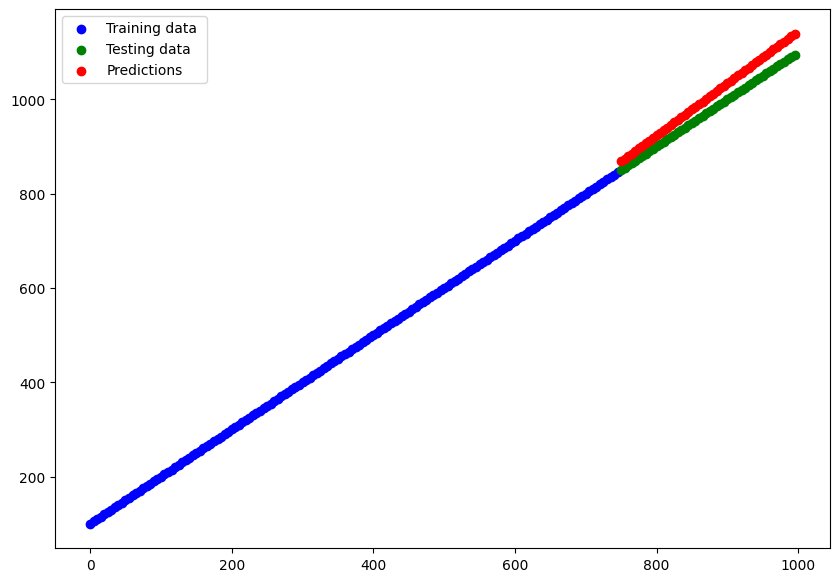

In [40]:
# Make prediction with our trained model
y_reg_preds = model_reg.predict(X_reg_test)

#Plot the models predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label = "Training data ")
plt.scatter(X_reg_test,y_reg_test,c='g',label = "Testing data")
plt.scatter(X_reg_test,y_reg_preds,c='r',label = "Predictions")
plt.legend()

### The missing piece is Non-Linearity

In [44]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.linear)
])
# Compiling the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr =0.001),
                metrics = ['accuracy'])
# Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.3063 - accuracy: 0.4140
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1884 - accuracy: 0.4370
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0661 - accuracy: 0.4460
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9540 - accuracy: 0.4540
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9282 - accuracy: 0.4560
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8679 - accuracy: 0.4630
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8227 - accuracy: 0.4590
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8214 - accuracy: 0.4600
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8206 - accuracy: 0.4590
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8198 - accuracy: 0.4590
Epoch 11/

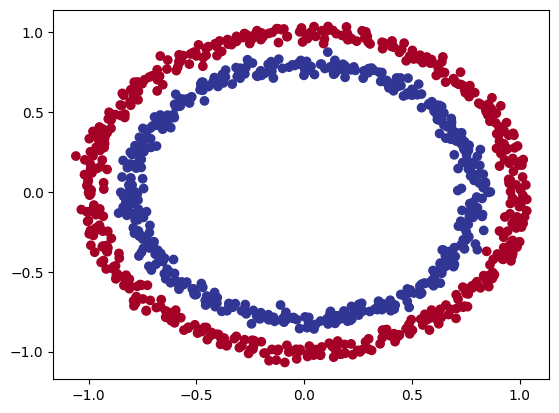

In [45]:
# Check our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


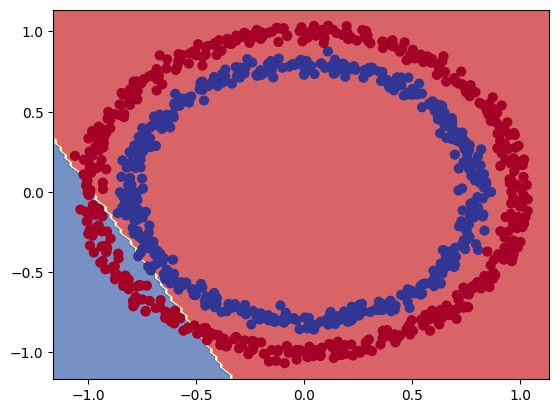

In [46]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

Building our models with non-linear activation functions.

In [47]:
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0227 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9995 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9843 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9586 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9367 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9314 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9194 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8940 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8781 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8662 - accuracy: 0.4800
Epoch 11/

In [52]:
# Set the random seed
tf.random.set_seed(42)
# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics =['accuracy'])
# Fit the model
history = model_6.fit(X,y,epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 2.0674 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 1.5474 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 1.3683 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 1.2295 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 1.1052 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.9679 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8567 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8087 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7831 - accuracy: 0.4540
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7665 - accuracy: 0.3940
Epoch 11/

In [53]:
# Evaluating the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8760


[0.28292301297187805, 0.8759999871253967]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


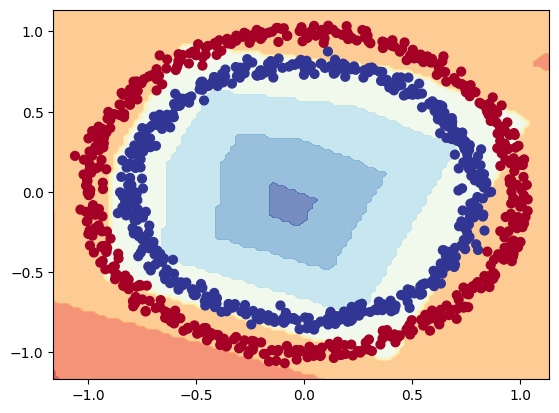

In [54]:
# Ploting the model predictions
plot_decision_boundary(model_6,X,y)

In [55]:
# Adding activation for output layer
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# Compiling the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# Fit the model
model_7.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6962 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5210
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5380
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6850 - accuracy: 0.5250
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5300
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5350
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5450
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5350
Epoch 11/

In [56]:
# Evaluating the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.9730


[0.3637741506099701, 0.9729999899864197]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


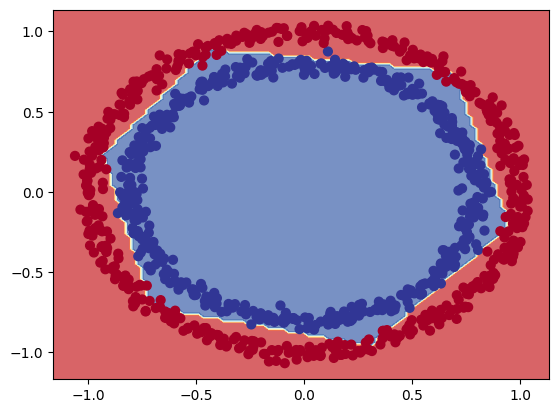

In [57]:
# Visualizing the model prediction
plot_decision_boundary(model = model_7, X=X,y=y)